## フィッシャーの線形判別分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt

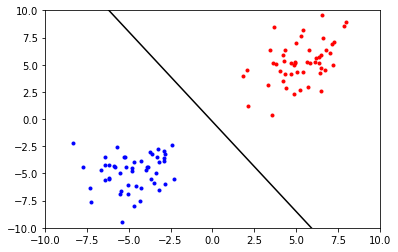

w = [[-0.03817095]
 [-0.02307965]] 



In [5]:
dim = 2

#直線の式
def f(x, a, b):
    return a*x + b

def plot(cls1, cls2, line=None):
    x, y = cls1.T
    plt.plot(x, y, 'bo', ms=3, label='class1')
    x, y = cls2.T
    plt.plot(x, y, 'ro', ms=3, label='class2')

    if not (line is None):
        plt.plot(line[0], line[1], 'k-', ms=5)

    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.show()

def fisher(cls1, cls2):
    #リストから行列に変換
    cls1 = np.array(cls1)
    cls2 = np.array(cls2)

    #各クラスの平均値
    mean1 = np.mean(cls1, axis=0)
    mean2 = np.mean(cls2, axis=0)

    #総クラス内共分散行列
    sw = np.zeros((dim, dim))
    for xn in cls1:
        xn = xn.reshape(dim,1)
        mean1 = mean1.reshape(dim,1)
        sw += np.dot((xn-mean1),(xn-mean1).T)
    for xn in cls2:
        xn = xn.reshape(dim,1)
        mean2 = mean2.reshape(dim,1)
        sw += np.dot((xn-mean2),(xn-mean2).T)
    
    #総クラス内共分散行列の逆行列
    sw_inv = np.linalg.inv(sw)

    #wを求める
    w = np.dot(sw_inv, (mean1-mean2))

    #決定境界直線を図示する
    mean = (mean1 + mean2)/2
    a = -w[0]/w[1]
    b = a*mean[0]+mean[1]
    x = np.linspace(-8, 8, 1000)
    y = f(x, a, b)

    plot(cls1, cls2, (x,y))

    return w

if __name__ == '__main__':
    #テスト用データ作成
    cov = [[3,1],[1,3]]
    cls1 = np.random.multivariate_normal([-5,-5], cov, 50)
    cls2 = np.random.multivariate_normal([5,5], cov, 50)

    #fisherで線形変換ベクトルｗを求める
    w = fisher(cls1, cls2)
    print('w =', w, '\n')